In [4]:


#TO USE datadotworld PACKAGE:
#1. create account at data.world, then run the next two lines:
#2. in terminal/powershell: pip install datadotworld[pandas]
#
#   IF THIS DOESN'T WORK BC YOU GET AN ERROR ABOUT "CCHARDET", RUN:
#    conda install -c conda-forge cchardet
#   THEN RERUN: pip install datadotworld[pandas] 
#
#3. in terminal/powershell: dw configure          
#3a. copy in API token from data.world (get from settings > advanced)

import datadotworld as dw
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

baby_names = dw.load_dataset('nkrishnaswami/us-ssa-baby-names-national')
baby_names = baby_names.dataframes['names_ranks_counts']

In [10]:
print(baby_names) #5 or 10 rows from top and bottom
#print(baby_names.head(20)) #top rows, pick how many
#baby_names.tail(20)
#baby_names.shape
#baby_names.info()
#baby_names.describe()
#baby_names['var'].nunique() 
#baby_names['var'].value_counts()[:10] #top 10 most used categories

             name sex  year     rank  count
0            John   M  1880      1.0   9655
1            Mary   F  1880      1.0   7065
2            John   M  1881      1.0   8769
3            Mary   F  1881      1.0   6919
4            John   M  1882      1.0   9557
5            Mary   F  1882      1.0   8148
6            John   M  1883      1.0   8894
7            Mary   F  1883      1.0   8012
8            John   M  1884      1.0   9388
9            Mary   F  1884      1.0   9217
10           John   M  1885      1.0   8756
11           Mary   F  1885      1.0   9128
12           John   M  1886      1.0   9026
13           Mary   F  1886      1.0   9889
14           John   M  1887      1.0   8110
15           Mary   F  1887      1.0   9888
16           John   M  1888      1.0   9247
17           Mary   F  1888      1.0  11754
18           John   M  1889      1.0   8548
19           Mary   F  1889      1.0  11648
20           John   M  1890      1.0   8502
21           Mary   F  1890     

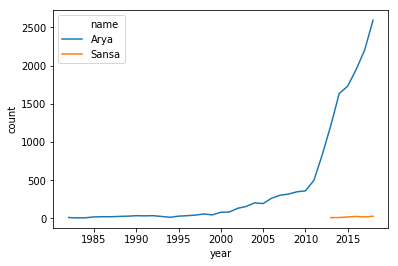

In [11]:
somenames = baby_names.query("name in ['Arya','Sansa']")
combined = somenames.groupby(['name','year'])['count'].sum().reset_index()
sns.lineplot(data=combined,x='year',y='count',hue ='name')

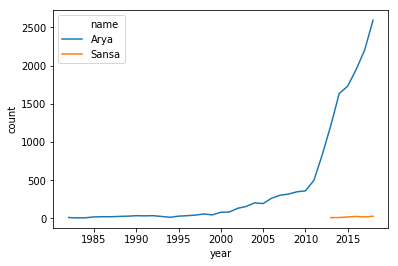

In [19]:
(
    baby_names
        .query("name in ['Arya','Sansa']")
        .groupby(['name','year'])
        ['count'].sum()
        .reset_index()
    .pipe((sns.lineplot, 'data'), hue = 'name', x = 'year', y = 'count')
)


Text(0.5, 1.0, 'PEOPLE NAMED THEIR KID KHALEESI')

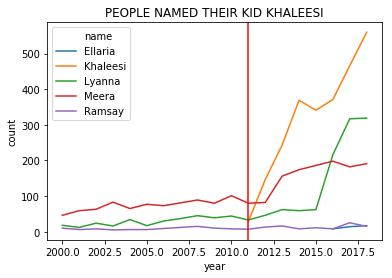

In [20]:
(
    baby_names
      .query('name in ["Khaleesi","Ramsay","Lyanna","Ellaria","Meera"] & \
         year >= 2000')
      .groupby(['name','year'])['count'].sum() # for each name-year, combine M and F counts
      .reset_index() # give use the column names back as they were (makes the plot call easy)
      .pipe((sns.lineplot, 'data'),hue='name',x='year',y='count')
)    
plt.axvline(2011, 0,160,color='red') # add a line for when the show debuted
plt.title("PEOPLE NAMED THEIR KID KHALEESI")